In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def OriginalDataGet():
    data = pd.read_csv("Data/AER_credit_card_data.csv")
    data['card']=data["card"].map({"yes":1, "no":0})
    data["selfemp"]=data['selfemp'].map({"yes":1, "no":0})
    data["owner"]=data['owner'].map({"yes":1, "no":0})
    return data

In [4]:
Original_data = OriginalDataGet()

高斯分布分析

In [5]:
def PlotGaussian(mean0, std0, label, color, X):
    sigma = np.sqrt(std0)
    X = np.sort(X[(X>=(mean0-3*sigma)) & (X<=(mean0+3*sigma))])
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)
    plt.plot(X, y, label=f'{label}', color=color)

C:\Users\rck72\AppData\Local\Temp\ipykernel_19980\692604685.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)
C:\Users\rck72\AppData\Local\Temp\ipykernel_19980\692604685.py:4: RuntimeWarning: divide by zero encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)
C:\Users\rck72\AppData\Local\Temp\ipykernel_19980\692604685.py:4: RuntimeWarning: invalid value encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)


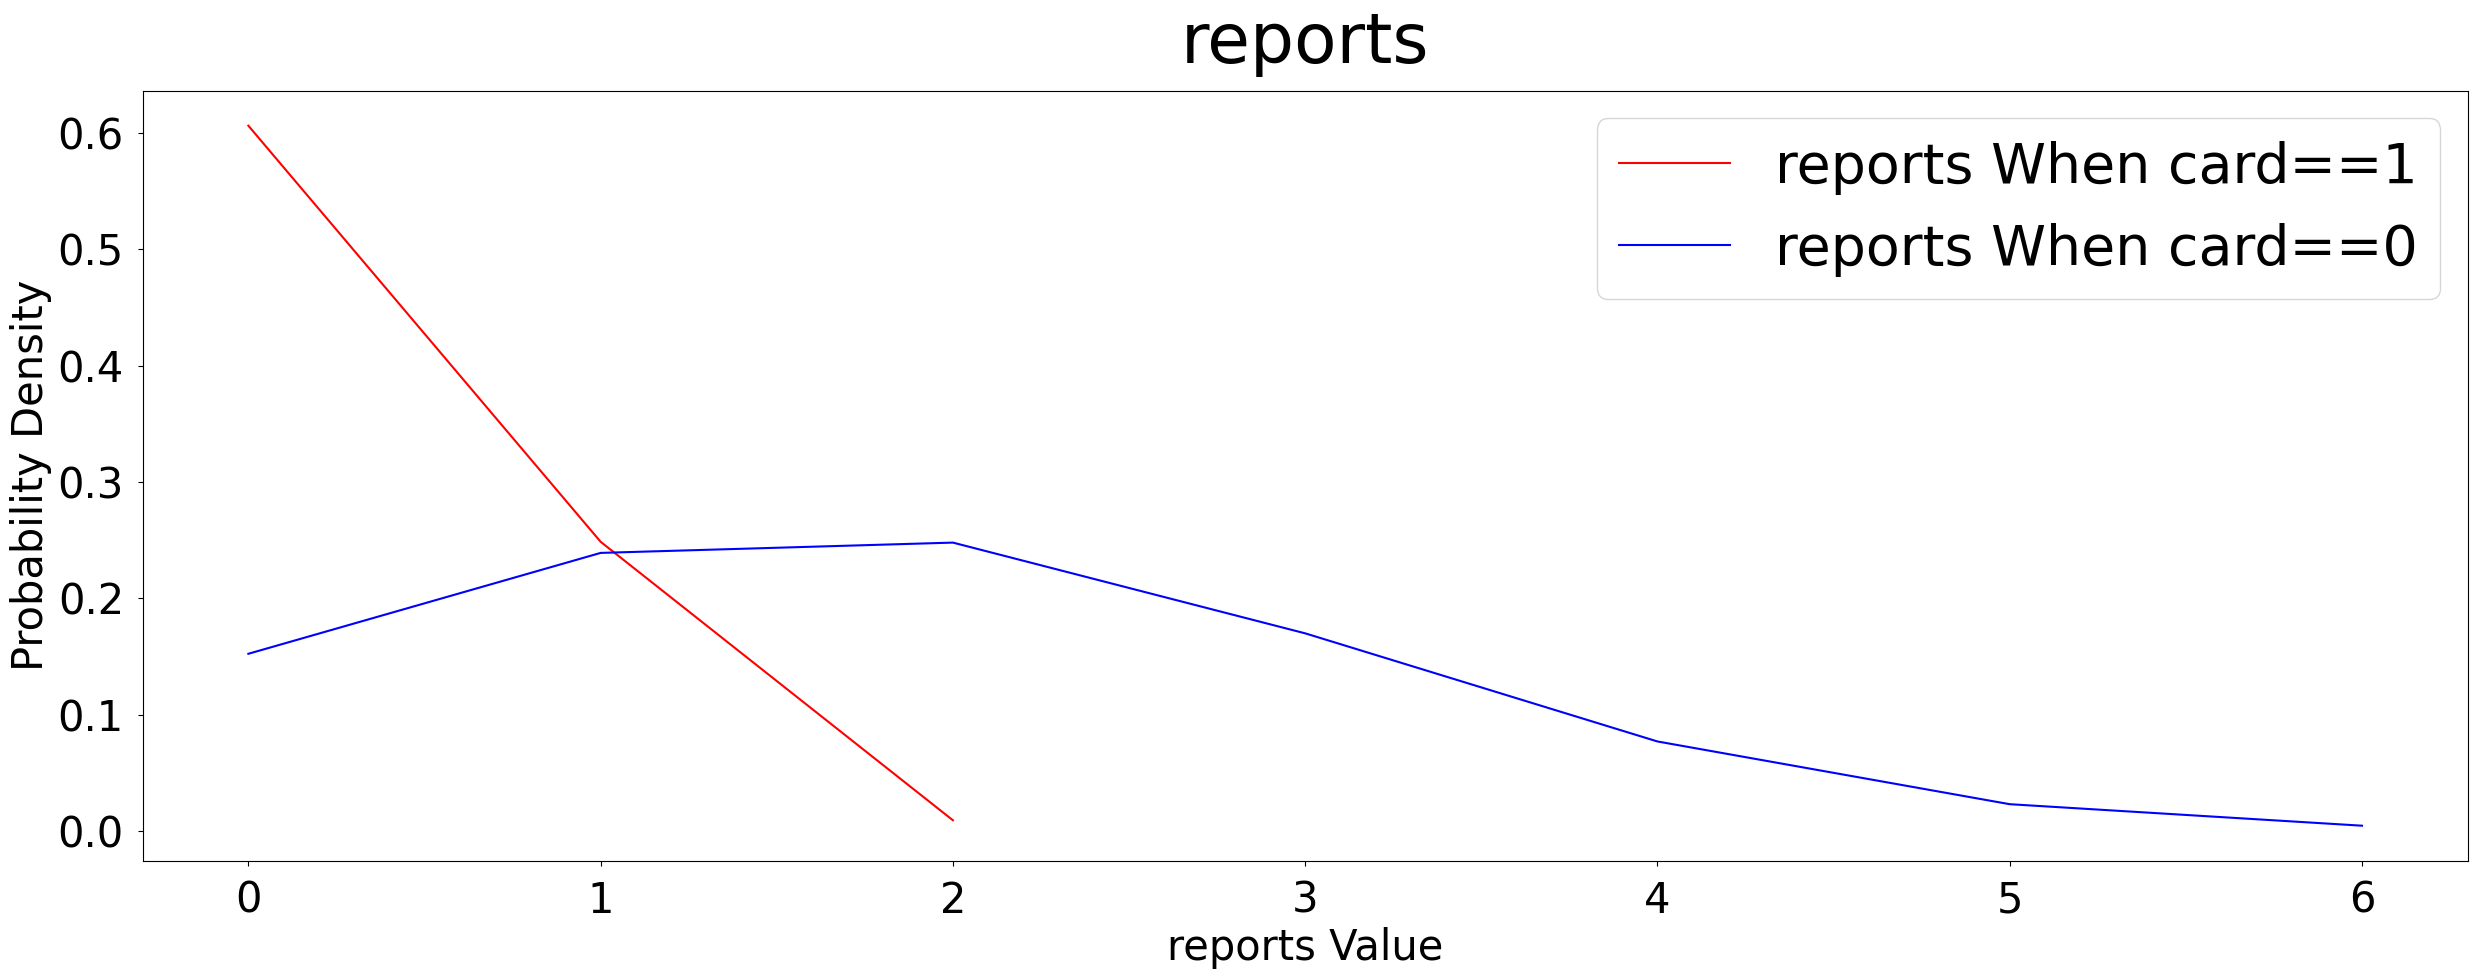

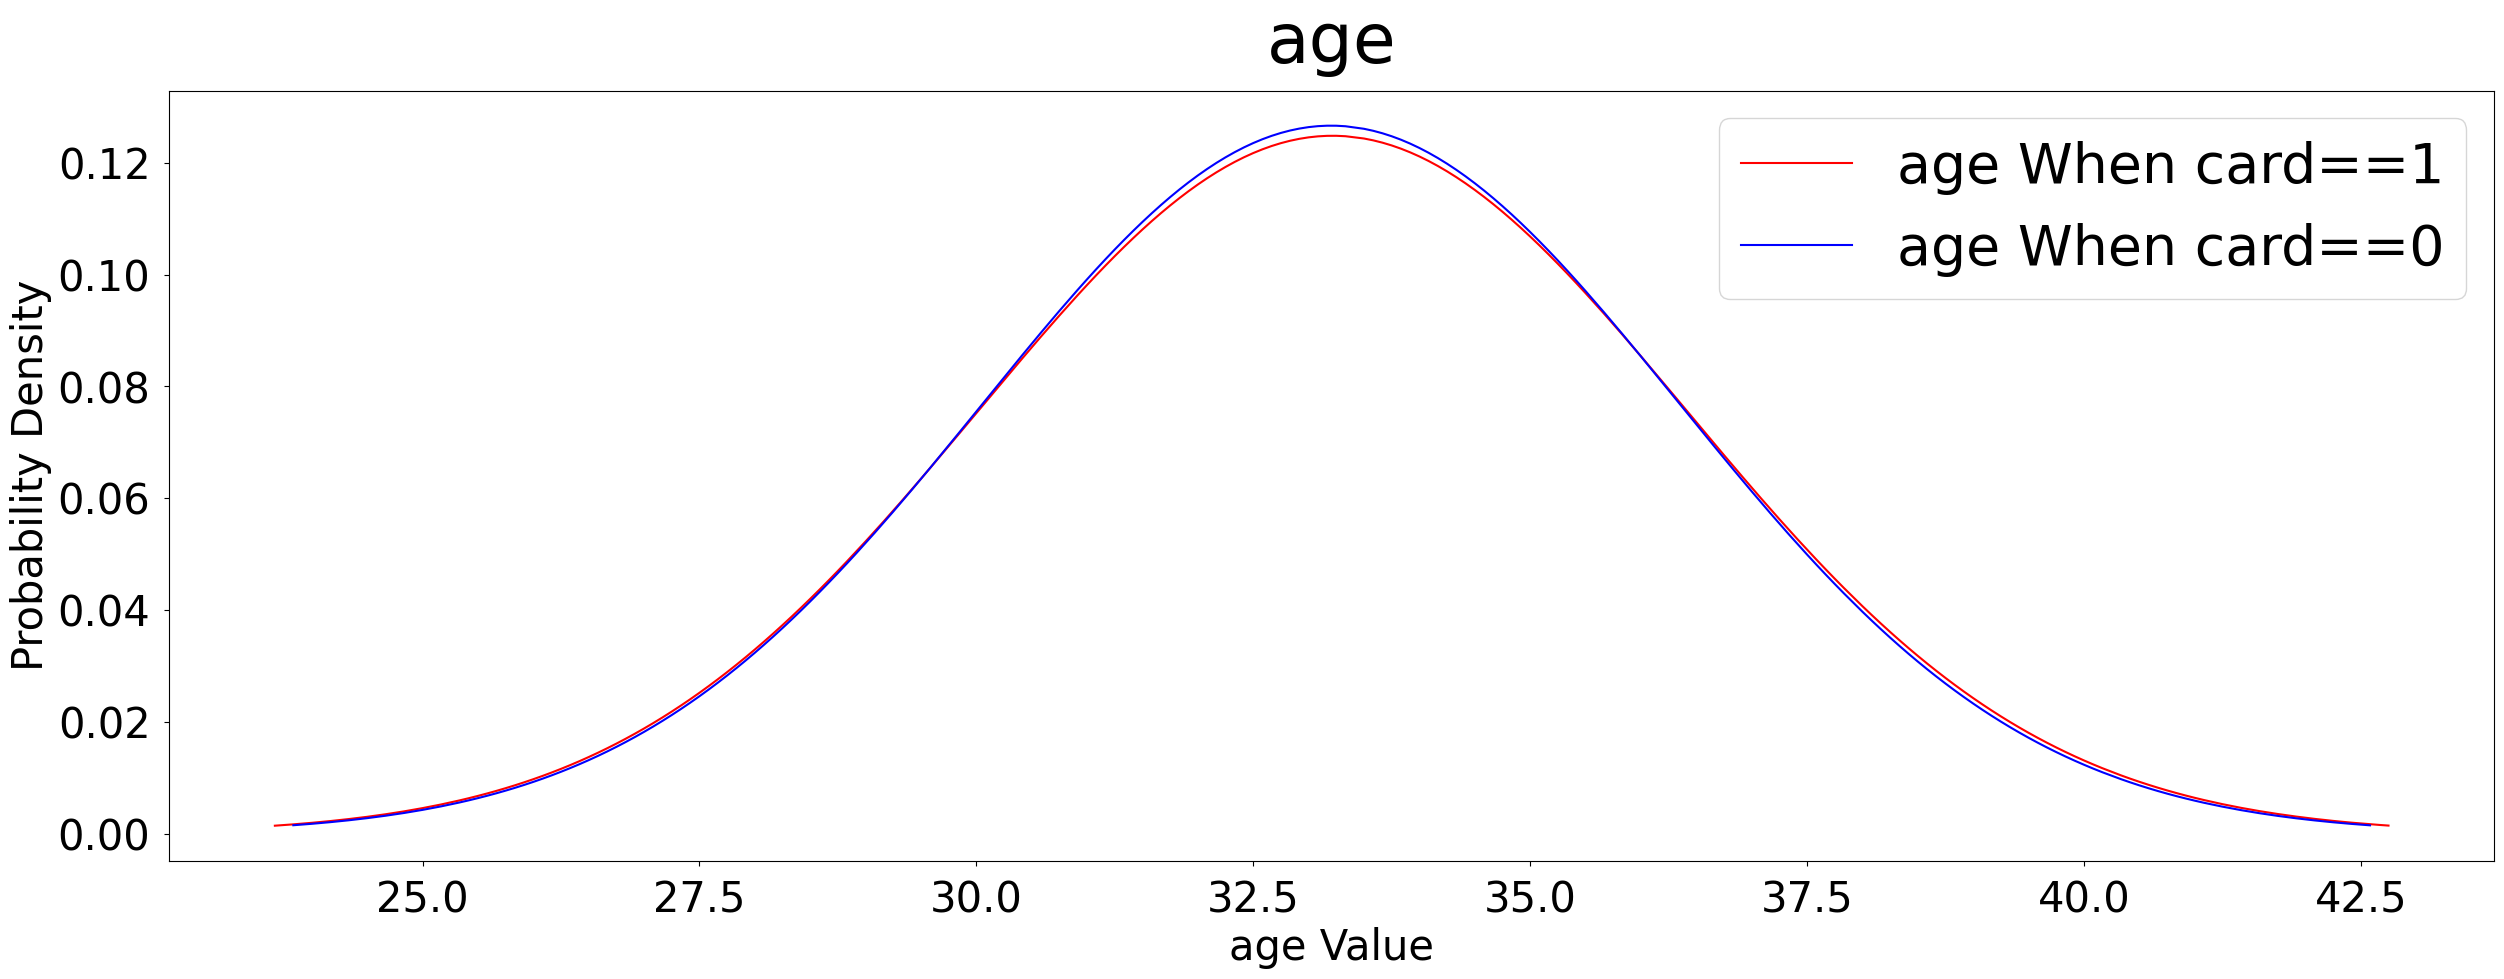

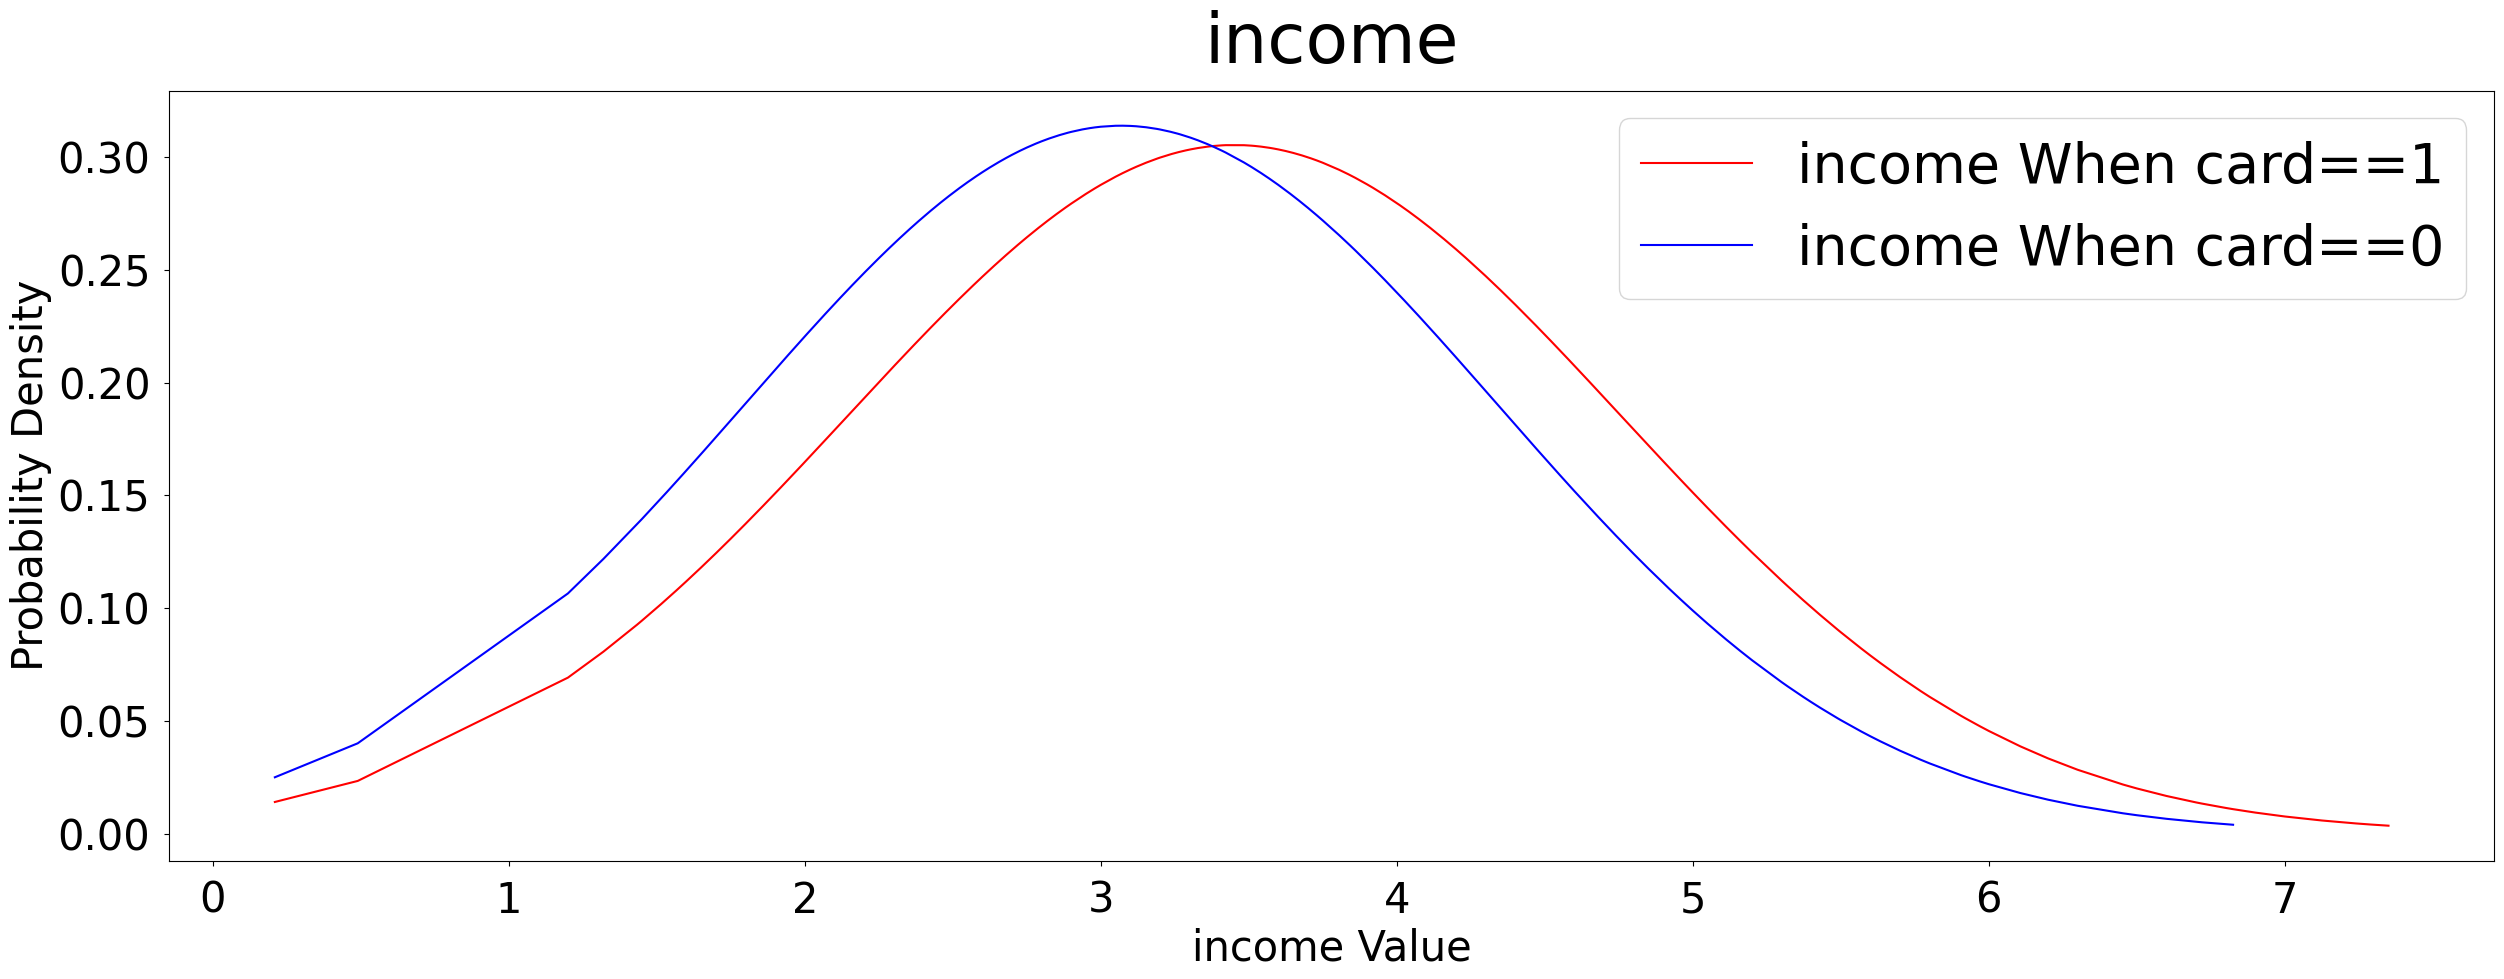

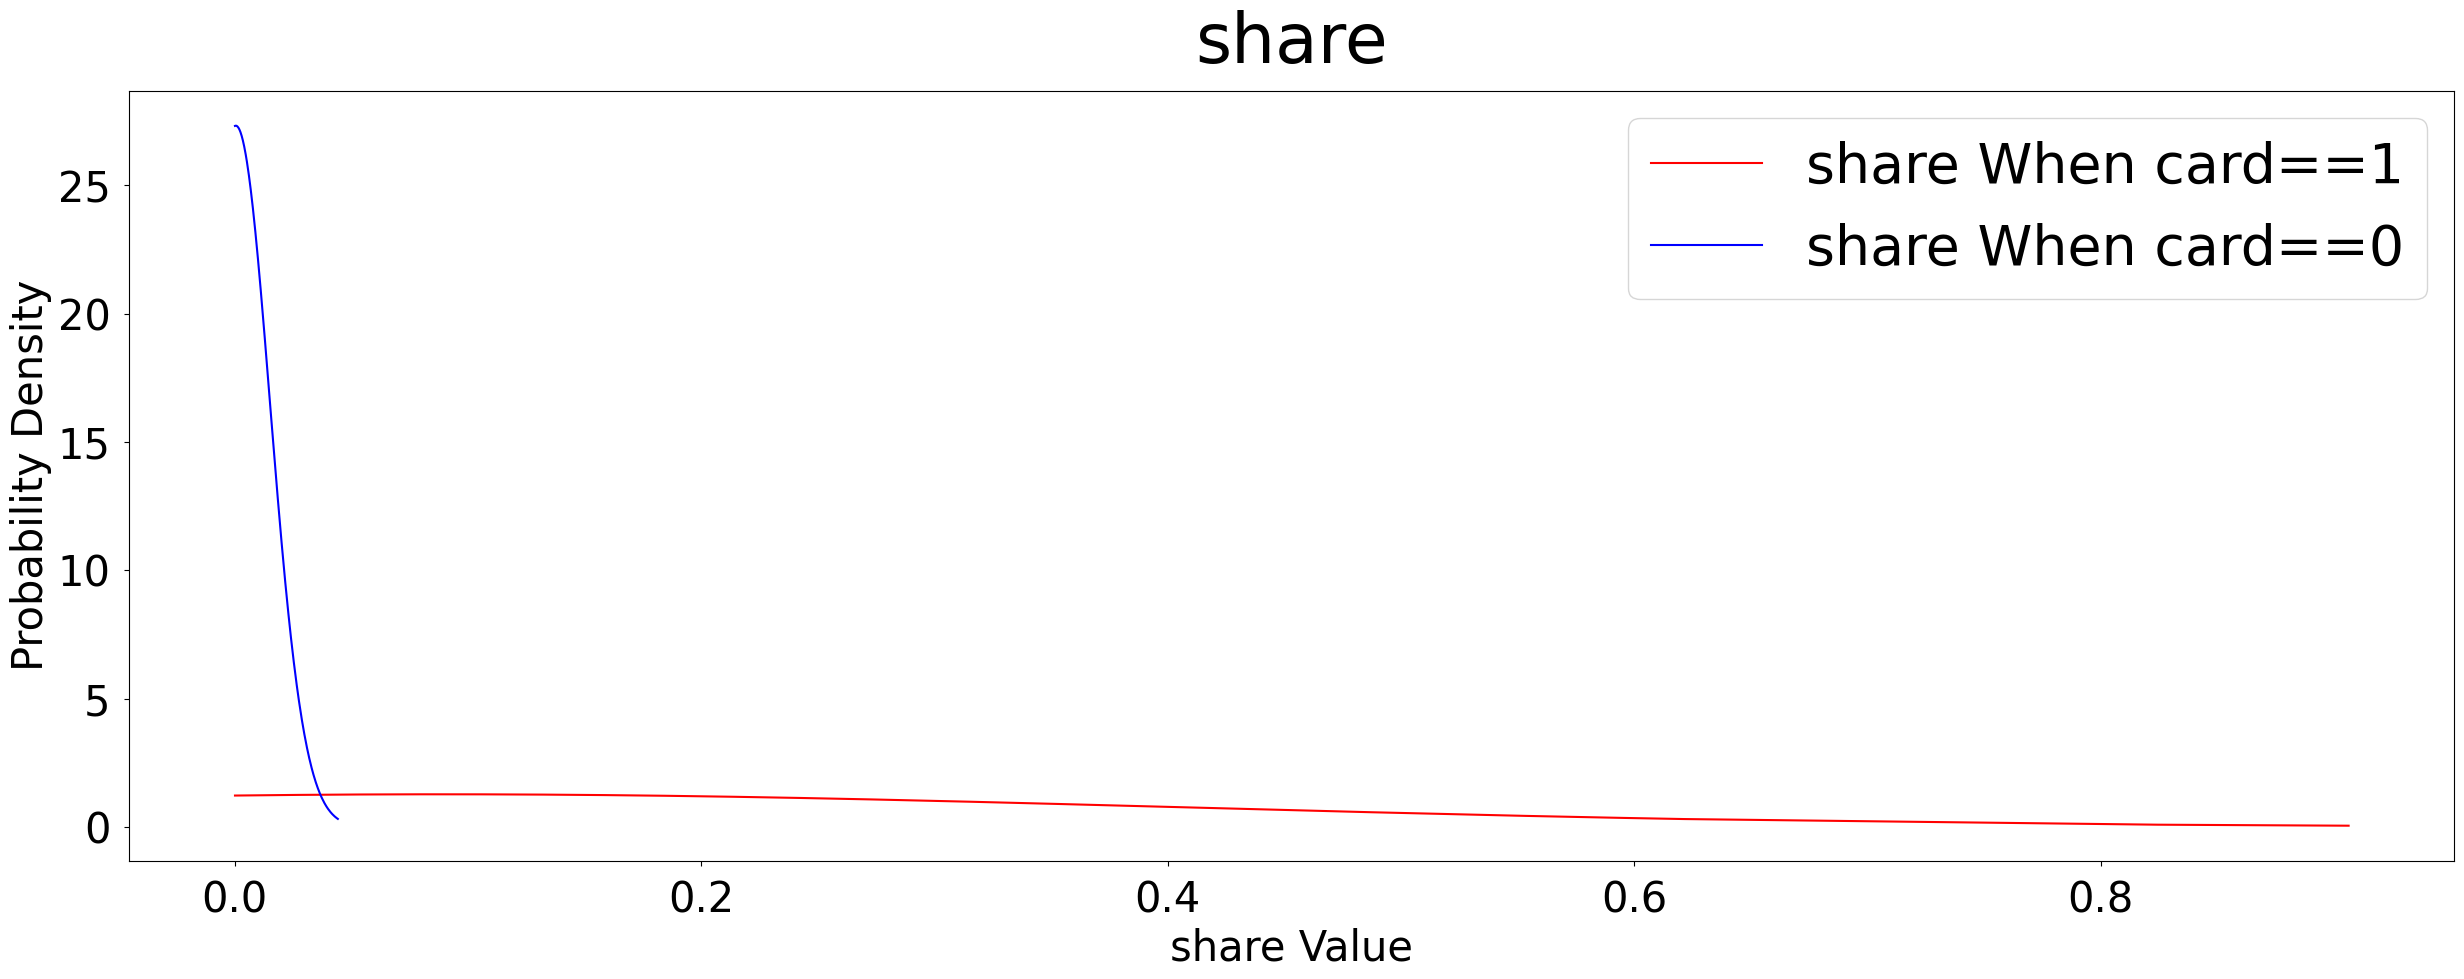

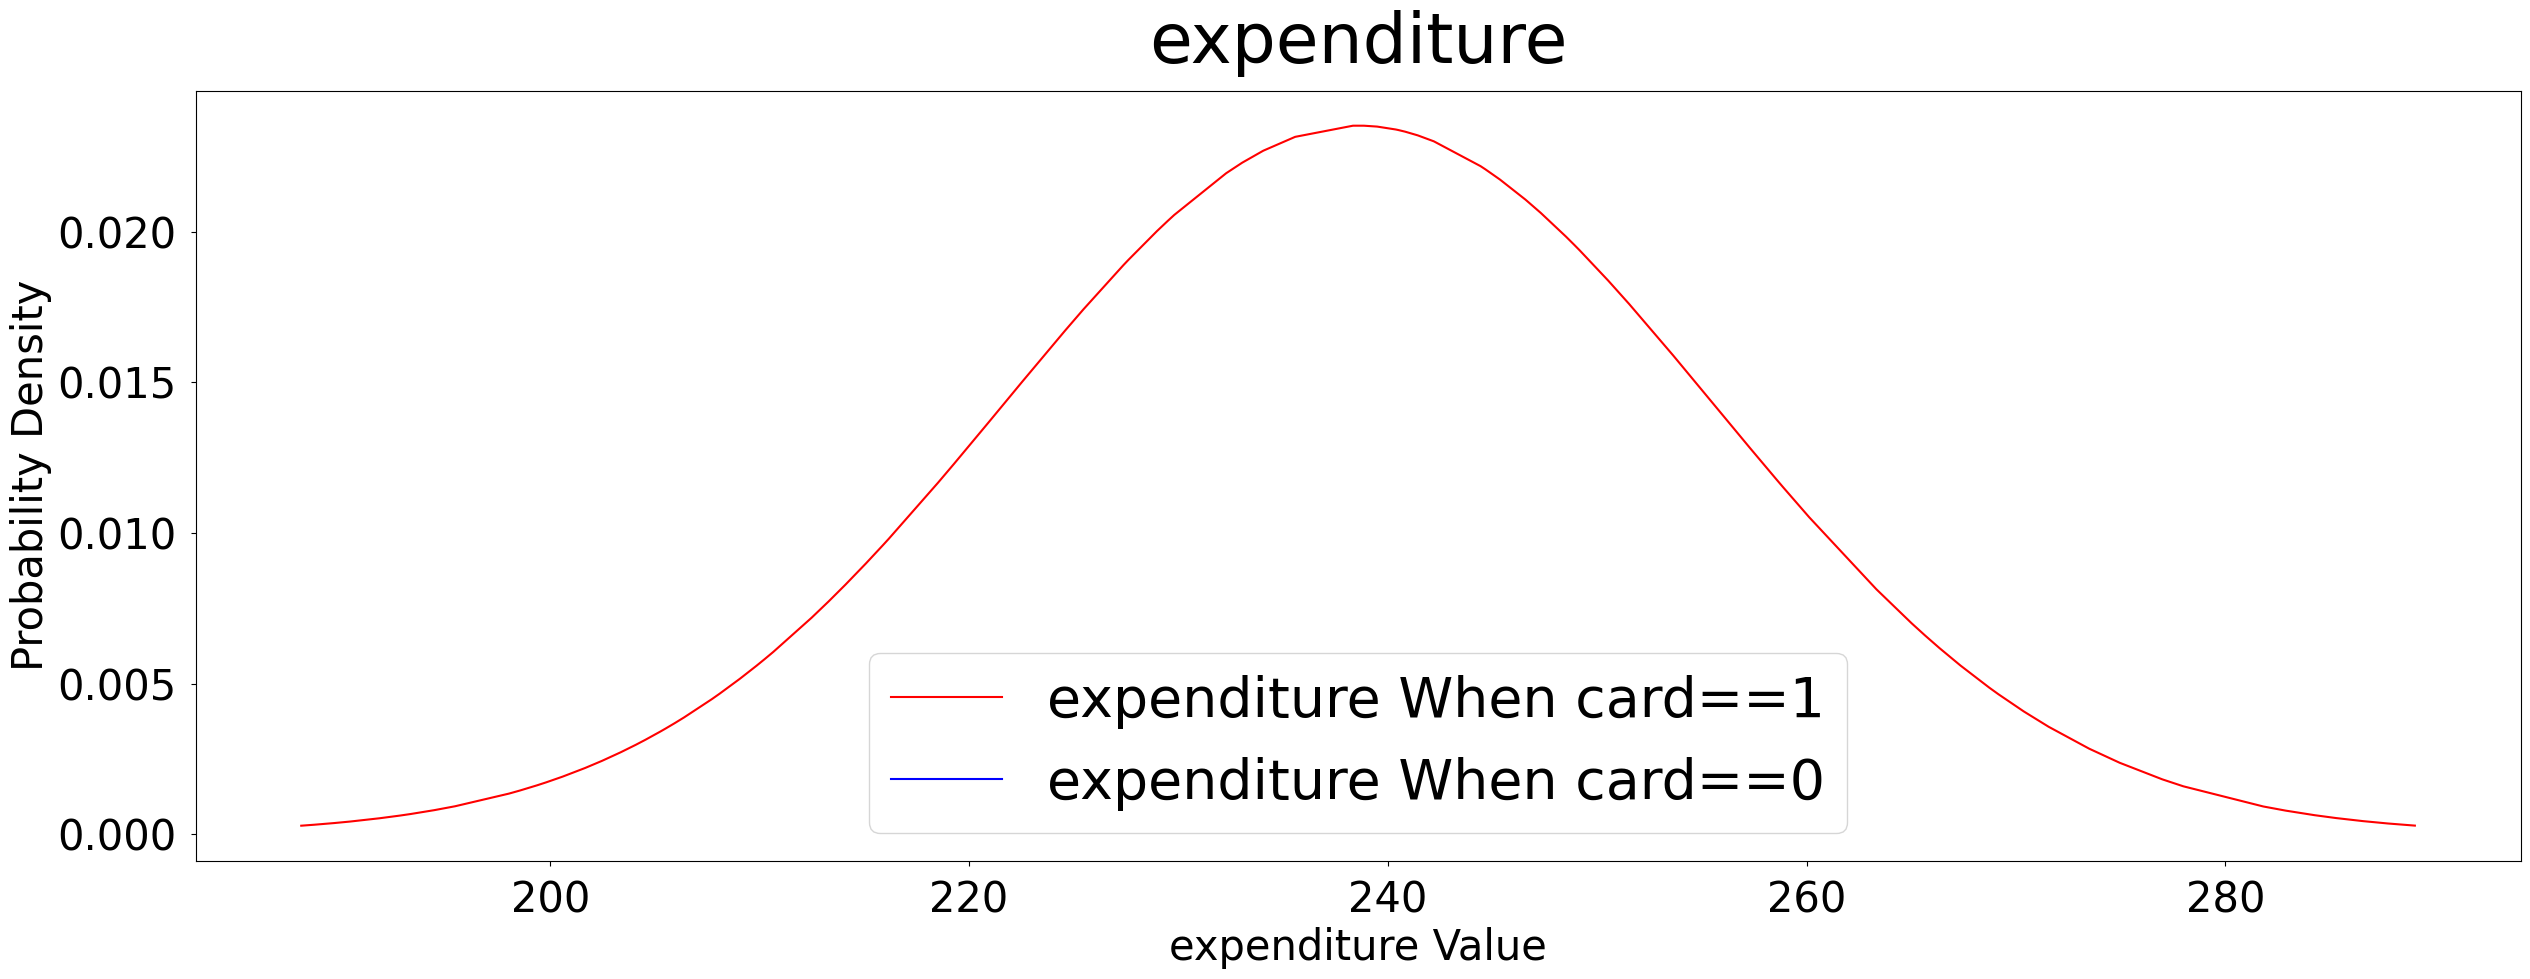

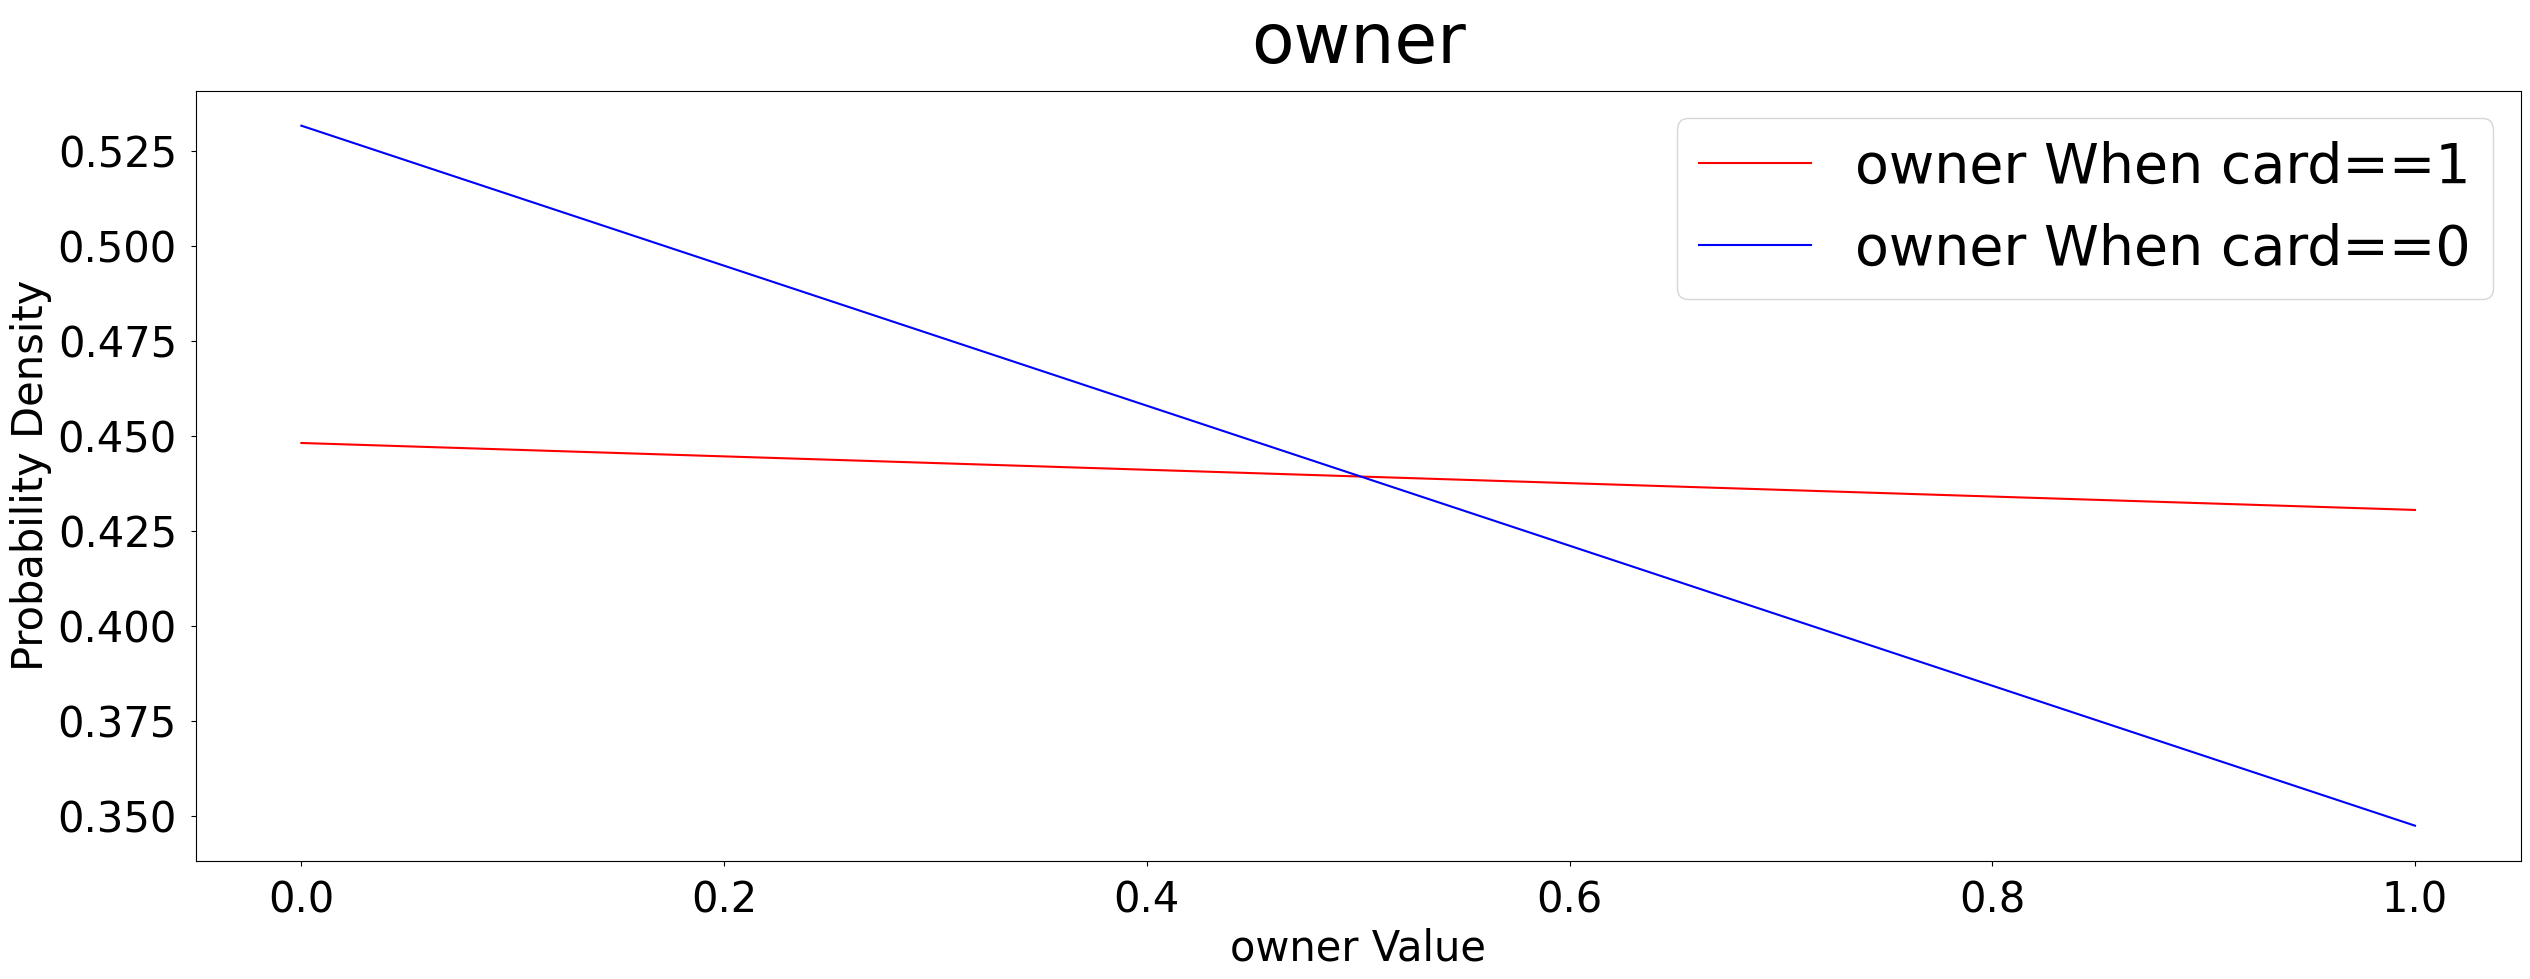

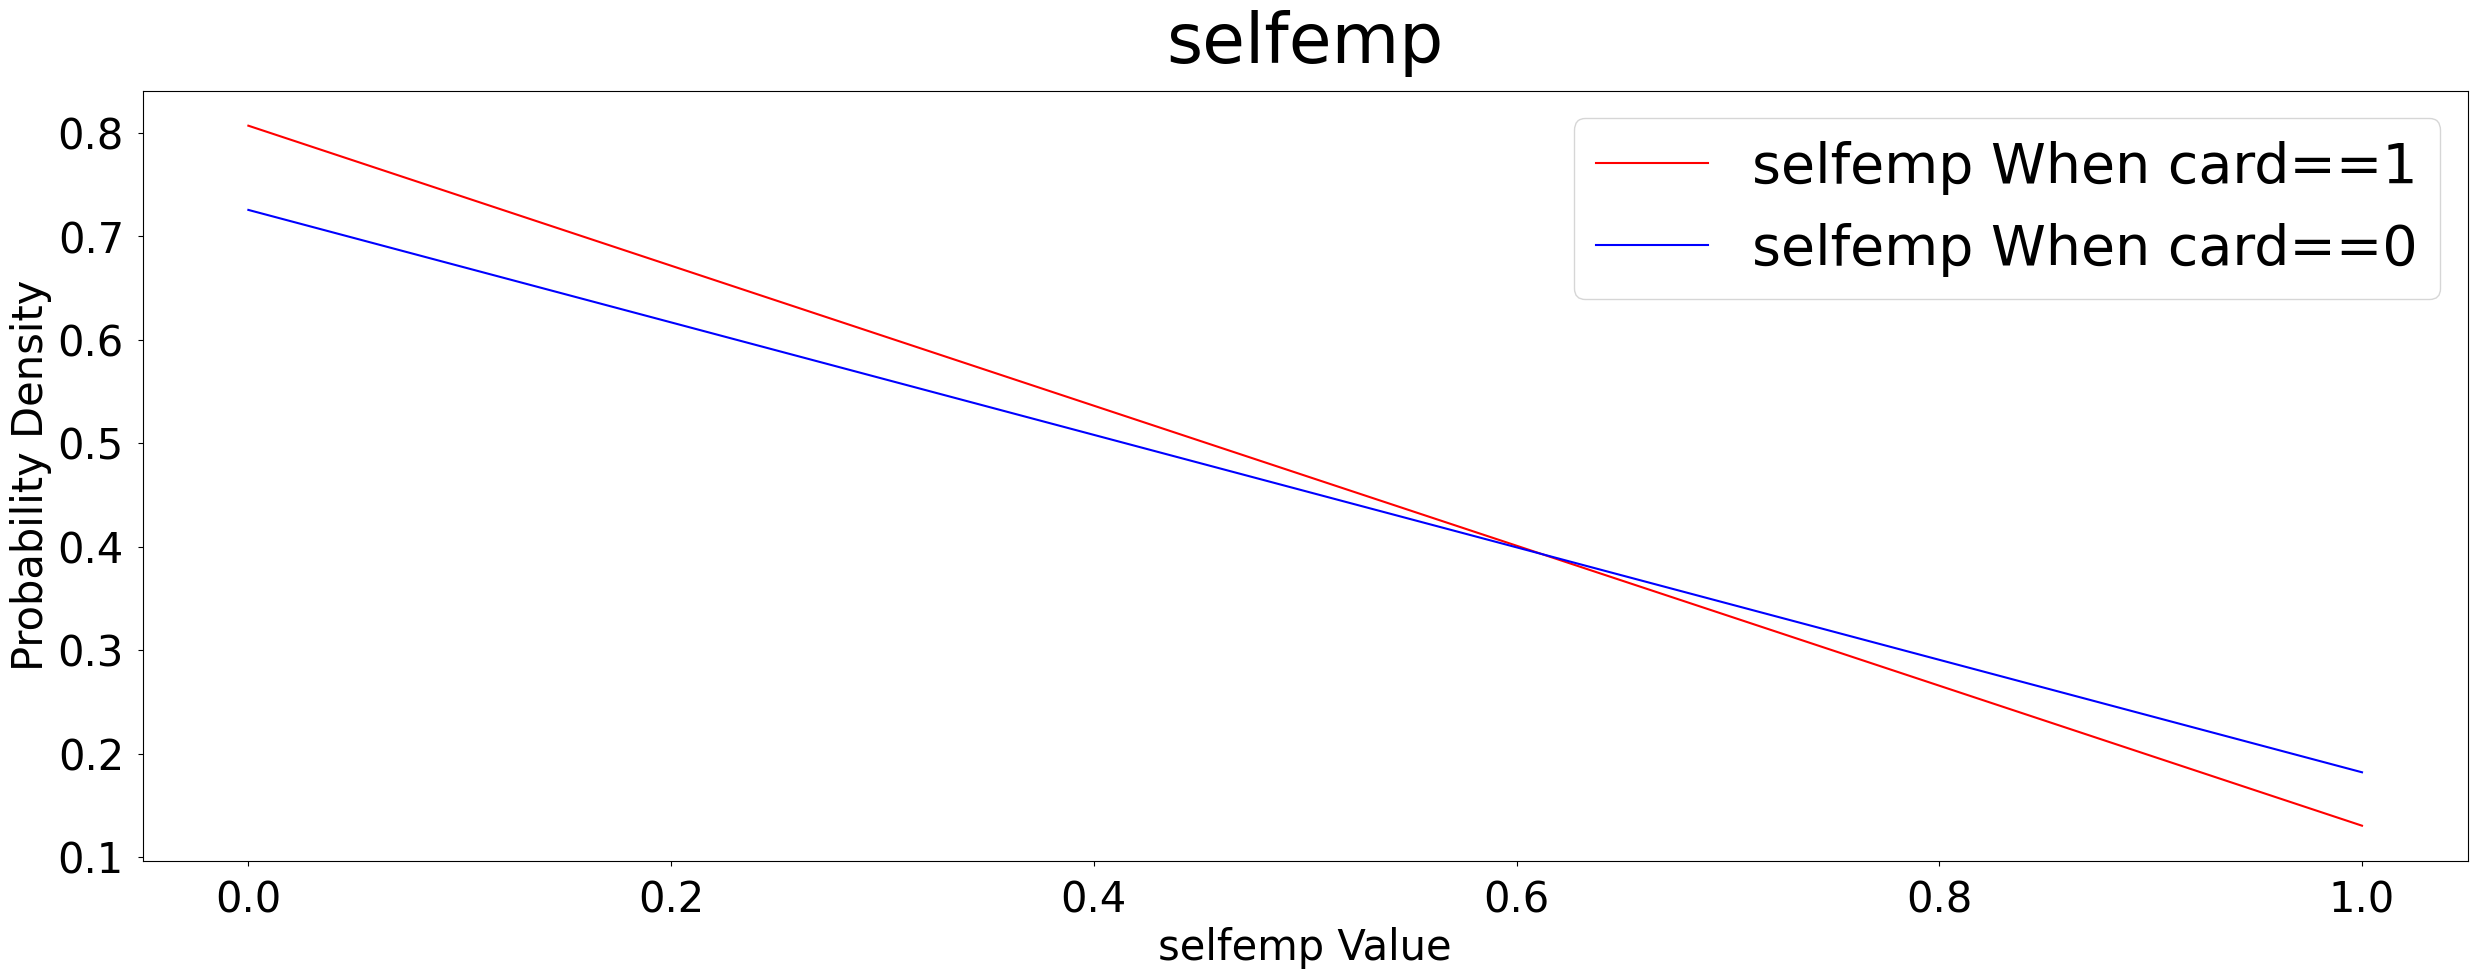

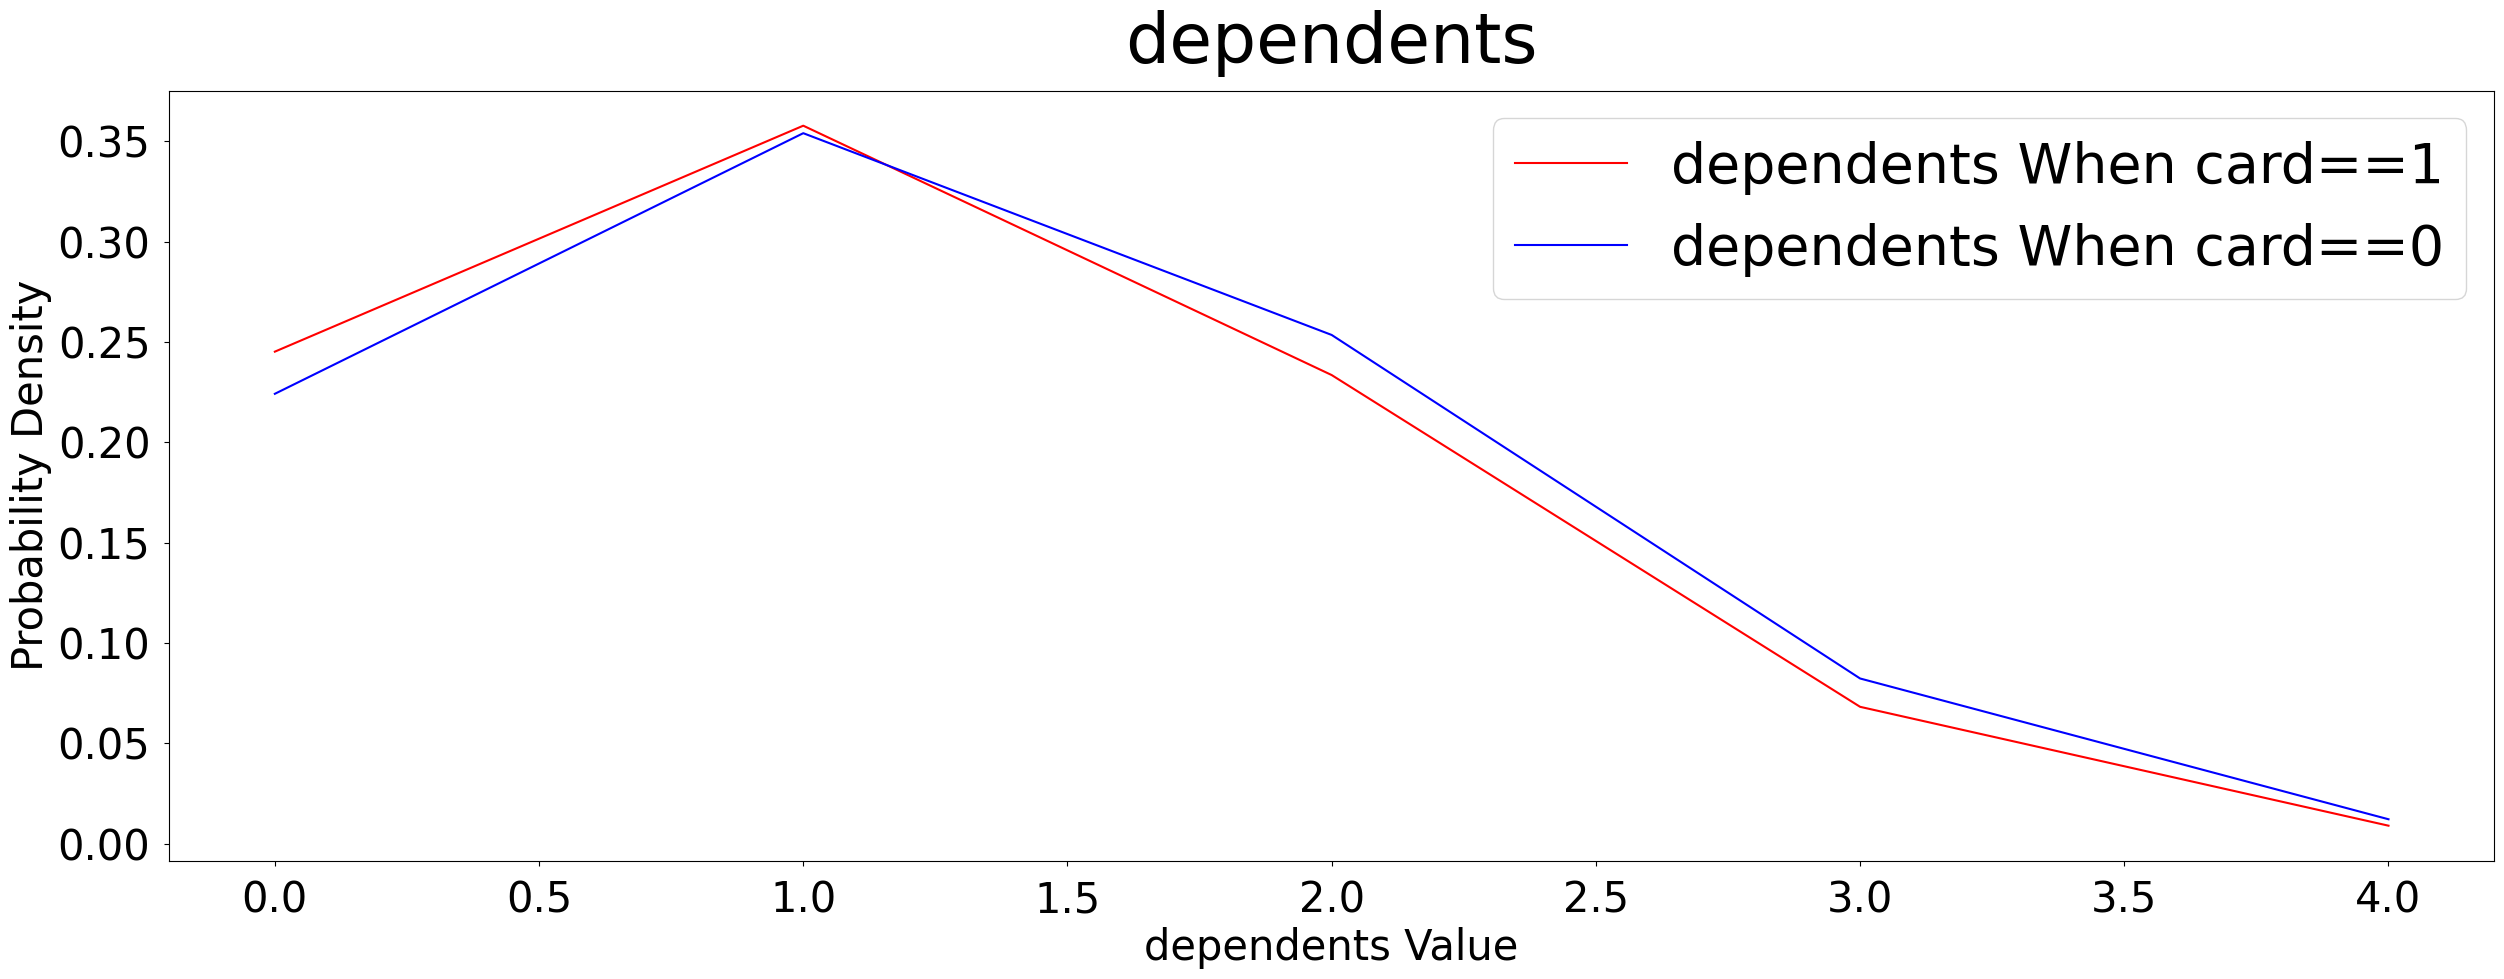

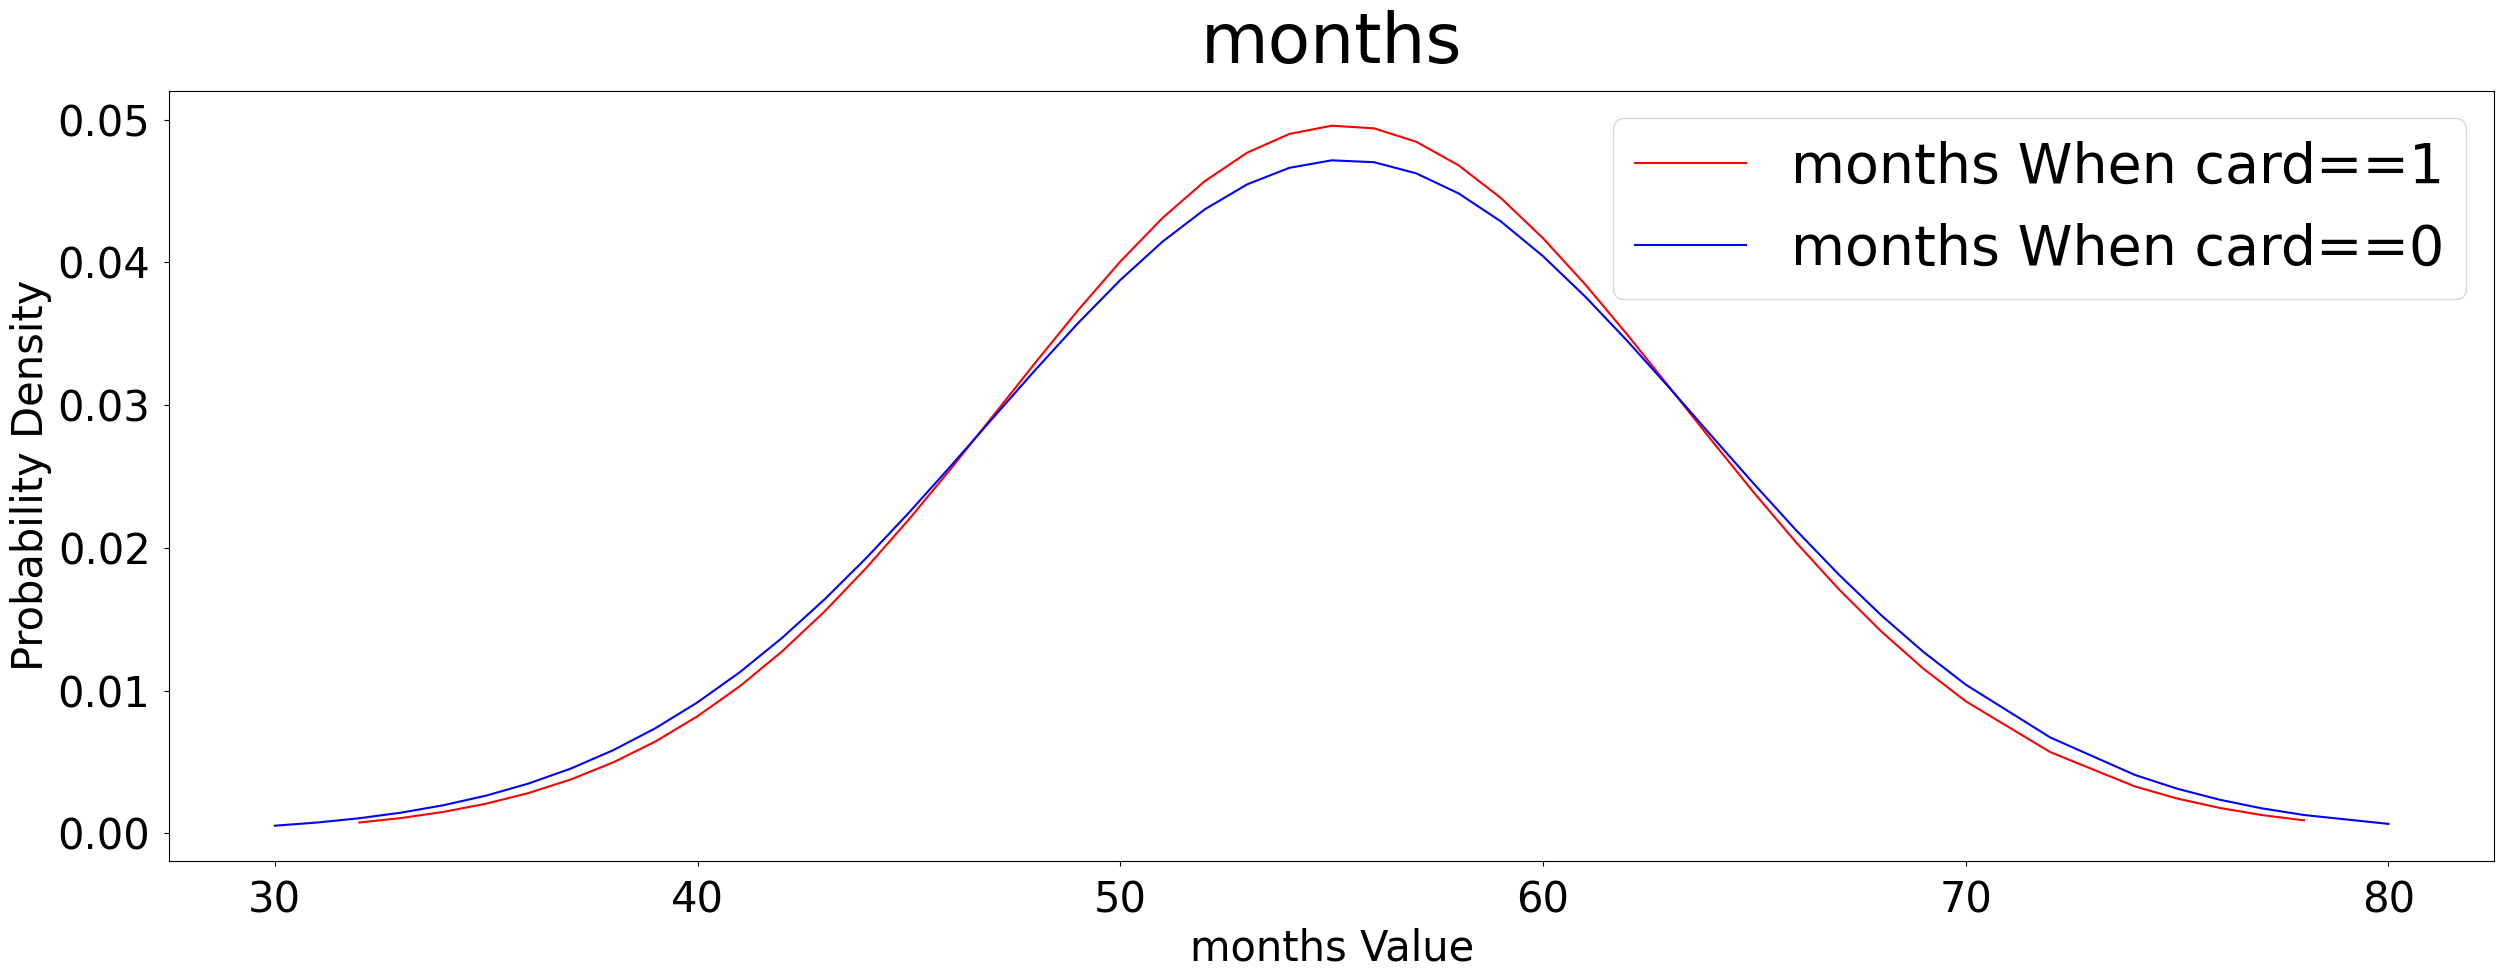

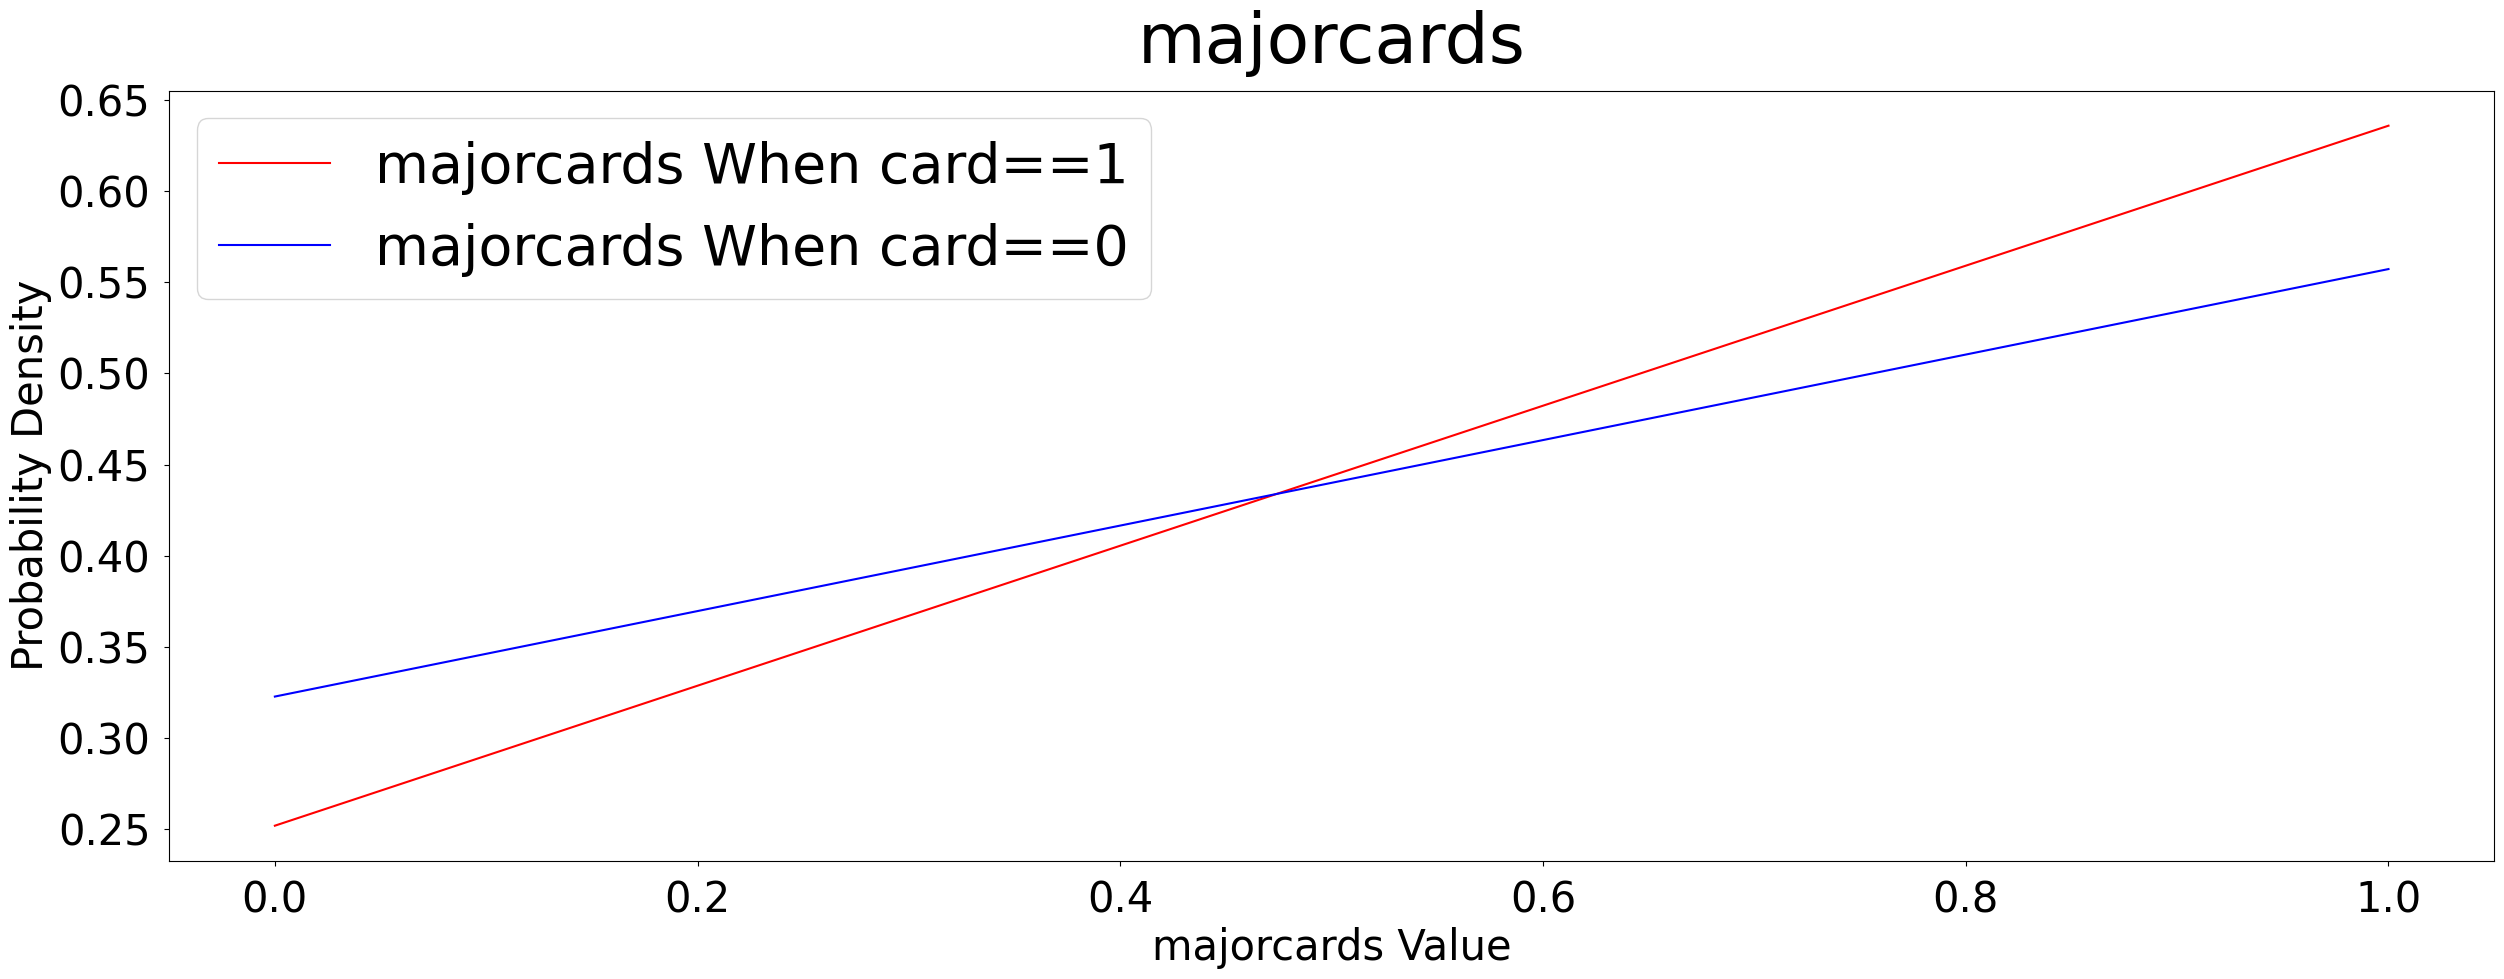

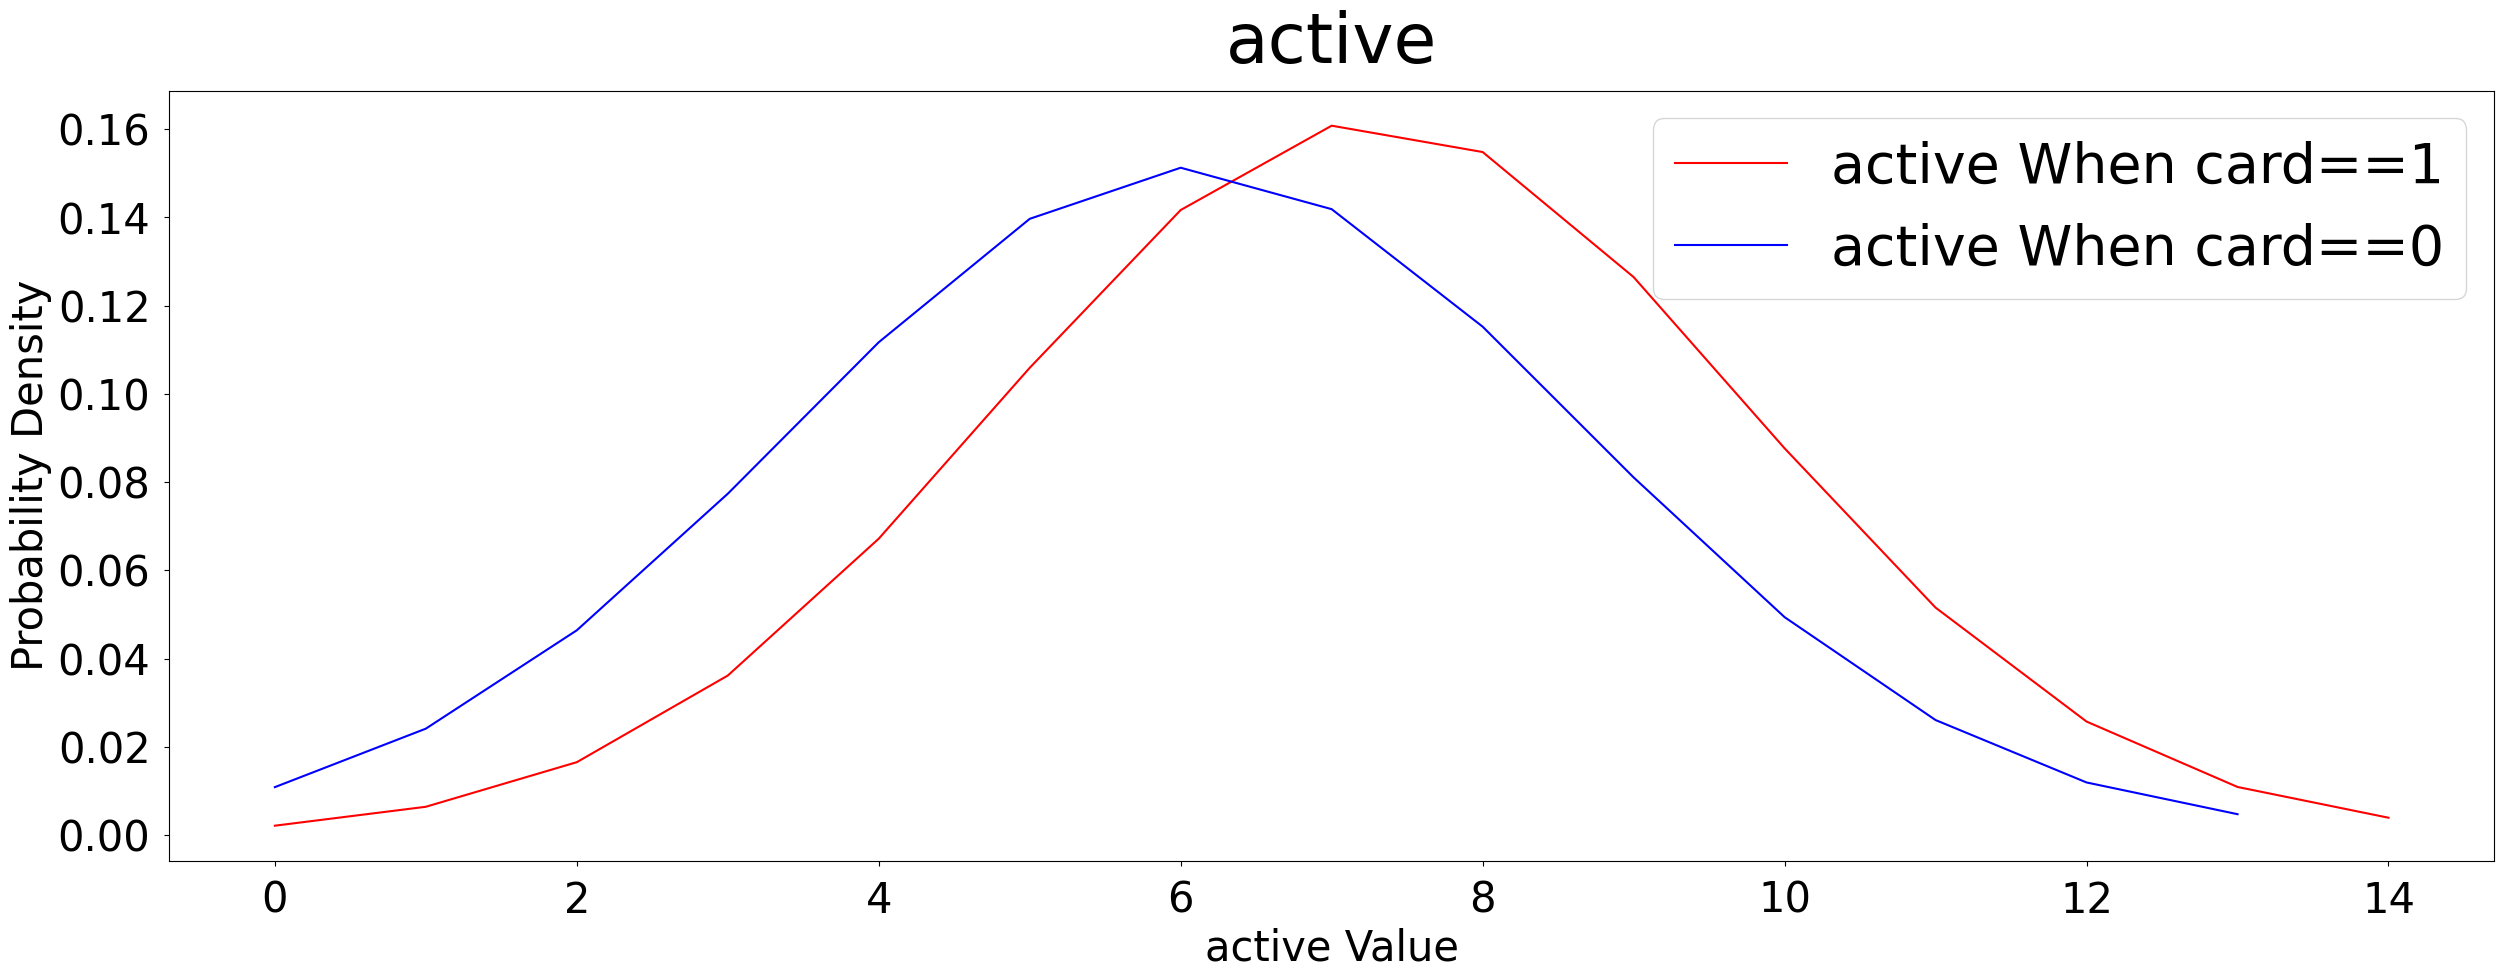

In [6]:
for n in Original_data.iloc[:,1:].columns:
    plt.figure(figsize=(30, 10))
    #plt.subplot(5, 2, 1)
    PlotGaussian(Original_data[n][Original_data["card"]==1].mean(), Original_data[n][Original_data["card"]==1].std(), f'{n} When card==1', 'red', Original_data[n])
    PlotGaussian(Original_data[n][Original_data["card"]==0].mean(), Original_data[n][Original_data["card"]==0].std(), f'{n} When card==0', 'blue', Original_data[n])
    plt.title(n, fontsize=50, pad=20)
    plt.xlabel(f'{n} Value', fontsize=30)
    plt.ylabel('Probability Density', fontsize=30)
    plt.legend(prop={'size': 40}, markerscale=20)
    plt.tick_params(axis='x', labelsize=30, pad=10)
    plt.tick_params(axis='y', labelsize=30, pad=10)
    #plt.tight_layout()
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
    #plt.show()
    #plt.savefig(f"Data/PlotGaussian_{n}.png")

In [7]:
name1 = "Data/Data1.csv"
data1 = pd.read_csv(name1)
target1 = data1["核卡狀況"]
feature_df1 = data1.iloc[:,1:]

name2 = "Data/Data2.csv"
data2 = pd.read_csv(name2)
target2 = data2["card"]
feature_df2 = data2.iloc[:,2:]

計算皮爾森相關系數

(Σ(x-xmean)Σ(y-ymean))/(Σ(x-xmean)^2 * Σ(y-ymean)^2)^(1/2)

In [8]:
pearson_csv = np.abs(Original_data.corr())
print(pearson_csv["card"])

#pearson_csv.to_csv("Data/Credit_card_pearson.csv")

card           1.000000
reports        0.452577
age            0.000537
income         0.094308
share          0.388028
expenditure    0.365814
owner          0.147826
selfemp        0.054340
dependents     0.036126
months         0.000268
majorcards     0.107769
active         0.080464
Name: card, dtype: float64


In [9]:
print(feature_df1.iloc[:, 3][target1==1].shape[0])
print(feature_df1.iloc[:, 3][target1==0].shape[0])
print(feature_df1.iloc[:, 4][target1==1].shape[0])
print(feature_df1.iloc[:, 4][target1==0].shape[0])

1017
295
1017
295


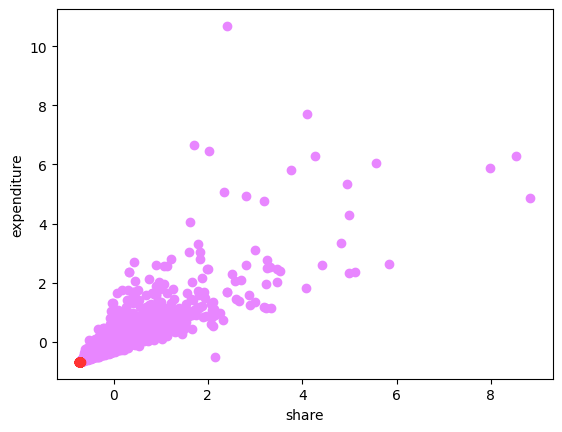

In [10]:

plt.scatter(feature_df1.iloc[:, 3][target1==1], feature_df1.iloc[:, 4][target1==1], c="#E886FF")
plt.scatter(feature_df1.iloc[:, 3][target1==0], feature_df1.iloc[:, 4][target1==0], c="#FF3333")
plt.xlabel("share")
plt.ylabel("expenditure")
plt.show()

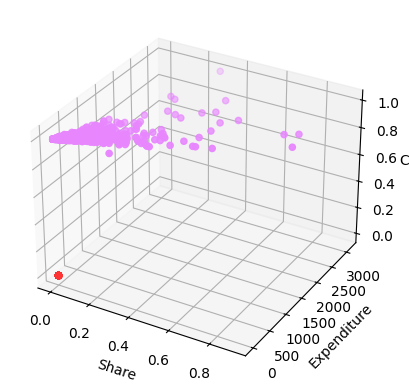

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
def trans_col(row):
    if row==1:
        return "#E886FF"
    else:
        return "#FF3333"
data_c = Original_data['card'].apply(trans_col)
sc = ax.scatter(Original_data['share'], Original_data['expenditure'], Original_data['card'], c=data_c, cmap=plt.hot())

ax.set_xlabel('Share')
ax.set_ylabel('Expenditure')
ax.set_zlabel('Card')

plt.show()

模型訓練

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

混淆矩陣預備評估預測好壞

In [13]:
def matrix(true, pre):#混淆矩陣
    f = metrics.f1_score(true, pre)
    pre_score = metrics.precision_score(true, pre)
    re_score = metrics.recall_score(true, pre)
    print(f"Precision: {pre_score}")
    print(f"Recall: {re_score}")
    print(f"f-measure: {f}")

分割數據

In [14]:
feature_df1.drop(["收支比","每月信用卡支出平均"], axis=1, inplace=True)

In [15]:
feature_df = feature_df1[["聯徵紀錄","年齡","年收入","扶養人數","居住時間","持有主卡","活躍帳戶","房地產_no","房地產_yes","創業人士_no","創業人士_yes"]]
feature = feature_df2.iloc[:,3:]
print(feature.shape)
#X_train, X_test, y_train, y_test = train_test_split(feature_df, target1, test_size=0.5)
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#print(lr.score(X_test,y_test))
#matrix(y_test, lr.predict(X_test))


(1312, 16)


In [16]:
dat = pd.read_csv("Data/all_score_describe3.csv")
print(dat)

  Unnamed: 0       score   Precision      Recall   f_measure
0      count  100.000000  100.000000  100.000000  100.000000
1       mean    0.660888    0.623999    0.527469    0.569653
2        std    0.020639    0.030802    0.058221    0.038069
3        min    0.598579    0.540107    0.369295    0.464752
4        25%    0.646536    0.597245    0.493776    0.542966
5        50%    0.661634    0.627193    0.541494    0.582856
6        75%    0.678508    0.652551    0.564315    0.603898
7        max    0.694494    0.673203    0.614108    0.614719


In [17]:
a = "card,income,share,expenditure,reports_equal and greater then 4,reports_less than 4,age_18~30,age_30~50,age_50~,owner_no,owner_yes,selfemp_no,selfemp_yes,dependents_0~1,dependents_1~,months_60~,months_~50,majorcards_0,majorcards_>=1,majorcards_0,majorcards_>=1"
a = a.split(",")
with open("T.txt", "w+", encoding="utf-8-sig") as fp:
    for n in a:
        fp.write(f"{n}\n")